In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

df_data = pd.read_csv('dataus2023.csv')


df_firms = pd.read_csv('firmsus2023.csv')




In [2]:
df_data['qdate'] = pd.PeriodIndex(df_data.q,freq="q")


df_firms1 = df_firms[["empresa","Nombre","status","naics1"]]
df_firms1.columns= ["firm","Nombre","status","industria"]

df_firms1
data = pd.merge(df_data, df_firms1, on="firm", how = "left")

data.set_index(['firm','qdate'],inplace = True)


In [12]:
data['ry'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(4))
data['rq'] = np.log(data['adjprice']) - np.log(data.groupby(['firm'])['adjprice'].shift(1))

data['f1rq'] = data.groupby(['firm'])['rq'].shift(-1)
data['f4rq'] =  data.groupby(['firm'])['rq'].shift(-4)

data['f1ry'] = data.groupby(['firm'])['ry'].shift(-1)
data['f4ry'] =  data.groupby(['firm'])['ry'].shift(-4)



data['ebit'] = data['revenue'] - data['cogs'] - data['sgae']
data['f1rq'] = data['rq'].shift(-1)
data['opm'] = np.where(data['revenue'] == 0, np.NaN, data['ebit'] / data['revenue'])
data['netincome'] = data['ebit'] + data['otherincome'] + data['extraordinaryitems'] - data['finexp'] - data['incometax']
data['pm'] = np.where(data['revenue'] == 0, np.NaN, data['netincome'] / data['revenue'])
data['ato'] = np.where(data['totalassets'] == 0, np.NaN, data['revenue'] / data['totalassets'])
data['acidratio'] = np.where(data['currentliabilities']==0,np.NaN,data['currentassets'] / data['currentliabilities'])
data['finlev'] = np.where(data['totalassets'] == 0, np.NaN, data['longdebt'] / data['totalassets'])
data['mvalue'] = data['originalprice'] * data['sharesoutstanding']
data['bookvalue'] = data['totalassets'] - data['totalliabilities']





In [36]:

my_industry = data.loc[(data['fiscalmonth'] == 12) & (data['industria']== 'Industrias manufactureras')&(data['year']==2022)&(data['status']=="activo")]


my_industry.head()

,,q,fiscalmonth,revenue,cogs,sgae,otherincome,extraordinaryitems,finexp,incometax,totalassets,...,f4ry,ebit,opm,netincome,pm,ato,acidratio,finlev,mvalue,bookvalue
firm,qdate,,,,,,,,,,,,,,,,,,,,,
A,2022Q4,2022q4,12.00,6848000.00,3126000.00,2104000.00,-39000.00,0.00,75000.00,250000.00,10532000.00,...,NaN,1618000.00,0.24,1254000.00,0.18,0.65,2.03,0.26,44307180.79,5305000.00
AA,2022Q4,2022q4,12.00,12451000.00,10212000.00,1549000.00,118000.00,-161000.00,106000.00,664000.00,14756000.00,...,NaN,690000.00,0.06,-123000.00,-0.01,0.84,1.75,0.12,8045332.89,6589000.00
AAOI,2022Q4,2022q4,12.00,222818.00,189191.00,92625.00,-1205.00,0.00,6193.00,1.00,408263.00,...,NaN,-58998.00,-0.26,-66397.00,-0.30,0.55,1.32,0.21,53909.83,184670.00
AAON,2022Q4,2022q4,12.00,888788.00,651216.00,110811.00,399.00,0.00,2627.00,24157.00,813903.00,...,NaN,126761.00,0.14,100376.00,0.11,1.09,2.40,0.09,4006989.13,560714.00
AAPL,2022Q3,2022q3,12.00,394328000.00,223546000.00,51345000.00,-334000.00,0.00,0.00,19300000.00,352755000.00,...,0.25,119437000.00,0.30,99803000.00,0.25,1.12,0.88,0.28,2220977926.40,50672000.00


In [37]:
my_industry['log_totalassets'] = np.where(my_industry['totalassets']==0,np.NaN,np.log(my_industry['totalassets']))
my_industry['log_revenue'] = np.where(my_industry['revenue']==0,np.NaN,np.log(my_industry['revenue']))
my_industry['log_netincome'] = np.where(my_industry['netincome']==0,np.NaN,np.log(my_industry['netincome']))
my_industry['log_mvalue'] = np.where(my_industry['mvalue']==0,np.NaN,np.log(my_industry['mvalue']))

C:\Users\Litos\AppData\Local\Temp\ipykernel_2336\2033350681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_industry['log_totalassets'] = np.where(my_industry['totalassets']==0,np.NaN,np.log(my_industry['totalassets']))
C:\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Litos\AppData\Local\Temp\ipykernel_2336\2033350681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

## 1.1 Descriptive Statistics

In [38]:
# Calcular la media ponderada para 'pm'
w_pm = np.sum(my_industry['netincome']) / np.sum(my_industry['revenue'])
# Calcular la media ponderada para 'ato'
w_ato = np.sum(my_industry['revenue']) / np.sum(my_industry['totalassets'])
# Calcular la media ponderada para 'acidratio'
w_acidratio = np.sum(my_industry['currentassets']) / np.sum(my_industry['currentliabilities'])
# Calcular la media ponderada para 'finlev'
w_finlev = np.sum(my_industry['longdebt']) / np.sum(data['totalassets'])




In [39]:
print("weighted mean pm : ",w_pm)
print("weighted mean ato: ",w_ato)
print("weighted mean acidratio: ",w_acidratio)
print("weighted mean finlev: ",w_finlev)
my_industry[['pm','ato','acidratio','finlev']].describe()

weighted mean pm :  0.10628330143437634
weighted mean ato:  0.7396824924693044
weighted mean acidratio:  1.4517556119961494
weighted mean finlev:  0.0006761343893864698


,pm,ato,acidratio,finlev
count,1252.00,1472.00,1469.00,1472.00
mean,-18.12,0.61,5.03,0.21
std,154.86,0.66,6.39,0.24
min,-3857.75,-0.01,0.02,0.00
25%,-0.91,0.08,1.72,0.03
50%,0.01,0.54,2.73,0.15
75%,0.09,0.91,5.66,0.31
max,128.40,13.56,67.02,2.76


AL ANALIZAR LOS DIFERENTES VALORES DE TENDENCIA CENTRAL DE LOS RATIO, SE PUEDE OBSERVAR QUE LA MEDIA ARITMÉTICA DIFERENCIA MUCHO DE LA MEDIANA Y ESTO ES POR LA CANTIDAD DE VALORES EXTREMOS. POR OTRO LADO, LA MEDIA PONDERADA TIENE VALORES MÁS PARECIDOS A LA MEDIANA, SIN EMBARGO, DIFEREN UN POCO. YO CONSIDERO QUE LA MEDIA PONDERADA ES MEJOR PARA ESTE CASO YA QUE SE TRATAN DE UNA PROPORCIÓN Y LE DA UN PESO DISTINTO A CADA EMPRESA DEPENDIENDO DE SUS INGRESOS O ACTIVOS.

AL ANALIZAR LA VARIABLE PM, ME DIO UN VALOR DE 0.106 EN LA MEDIA PONDERADA Y DIFERENCIA BASTANTE DE LA MEDIA ARITMÉTICA CON UN VALOR DE -18.92. PERO, LA MEDIANA DA 0.01. SE PUEDE OBSERVAR UNA DIFERENCIA NOTORIA USANDO LA MEDIA PONDERADA EN ESTE CASO.

AL ANALIZAR LA VARIABLE ATO, DIÓ UN VALOR DE 0.73 PARA LA MEDIA PONDERADA Y UN VALOR DE 0.61 PARA LA MEDIA ARITMÉTICA, NO DIFIERE MUCHO TAMPOCO CON RESPECTO A LA MEDIANA YA QUE DA UN VALOR DE 0.54.


# 1.2 Multiple Regression - advanced topics

## 1.2.1 Calculation of variables

In [212]:

my_industry_allq = data.loc[(data['fiscalmonth'] == 12) & (data['industria']== 'Industrias manufactureras')&(data['status']=="activo")]

my_industry_allq['log_mvalue'] = np.where(my_industry_allq['mvalue']==0,np.NaN,np.log(my_industry_allq['mvalue']))

C:\Users\Litos\AppData\Local\Temp\ipykernel_2336\142968127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_industry_allq['log_mvalue'] = np.where(my_industry_allq['mvalue']==0,np.NaN,np.log(my_industry_allq['mvalue']))


#### Firm size as a categorical variable. For each quarter, you have to label firms in 3 equal groups: small, medium, big according to the market value of the firms.



In [213]:
dumms = my_industry_allq.copy()

dumms['size'] = dumms[['log_mvalue']].transform(lambda x: pd.qcut(x,3,labels = ["small","medium","large"]))

dumms

q  fiscalmonth     revenue       cogs       sgae   
firm qdate                                                           
A    2000Q4  2000q4        12.00 10773000.00 5522000.00 4198000.00  \
     2001Q4  2001q4        12.00  8396000.00 5166000.00 4008000.00   
     2002Q4  2002q4        12.00  6010000.00 3694000.00 3923000.00   
     2003Q4  2003q4        12.00  6056000.00 3762000.00 3019000.00   
     2004Q4  2004q4        12.00  7181000.00 4058000.00 2737000.00   
...             ...          ...         ...        ...        ...   
ZYNE 2018Q4  2018q4        12.00       86.00       0.00   40483.83   
     2019Q4  2019q4        12.00        0.00       0.00   34319.81   
     2020Q4  2020q4        12.00        0.00       0.00   52062.54   
     2021Q4  2021q4        12.00        0.00       0.00   36770.39   
     2022Q4  2022q4        12.00        0.00       0.00   35251.54   

             otherincome  extraordinaryitems   finexp  incometax  totalassets   
firm qdate                                                                      
A    2000Q4    111000.00                0.00     0.00  407000.00   8425000.00  \
     2001Q4    301000.00           580000.00     0.00  -71000.00   7986000.00   
     2002Q4     60000.00           -10000.00     0.00 -525000.00   8203000.00   
     2003Q4     35000.00          -268000.00     0.00 1100000.00   6297000.00   
     2004Q4     54000.00                0.00     0.00   91000.00   7056000.00   
...                  ...                 ...      ...        ...          ...   
ZYNE 2018Q4      -474.67                0.00  -961.32       0.00     67327.44   
     2019Q4      -145.91                0.00 -1522.14       0.00     87764.60   
     2020Q4       481.72                0.00  -243.99       0.00     74056.78   
     2021Q4      -559.68                0.00   -21.05       0.00     81171.51   
     2022Q4      -631.13                0.00  -846.86       0.00     55520.89   

             ...     opm   netincome      pm  ato  acidratio  finlev   
firm qdate   ...                                                       
A    2000Q4  ...    0.10   757000.00    0.07 1.28       2.05    0.00  \
     2001Q4  ...   -0.09   174000.00    0.02 1.05       2.40    0.00   
     2002Q4  ...   -0.27 -1032000.00   -0.17 0.73       2.24    0.14   
     2003Q4  ...   -0.12 -2058000.00   -0.34 0.96       2.04    0.18   
     2004Q4  ...    0.05   349000.00    0.05 1.02       2.45    0.16   
...          ...     ...         ...     ...  ...        ...     ...   
ZYNE 2018Q4  ... -469.74   -39911.18 -464.08 0.00       6.88    0.00   
     2019Q4  ...     NaN   -32943.58     NaN 0.00       7.22    0.00   
     2020Q4  ...     NaN   -51336.83     NaN 0.00       5.27    0.00   
     2021Q4  ...     NaN   -37309.02     NaN 0.00       8.10    0.00   
     2022Q4  ...     NaN   -35035.81     NaN 0.00       5.97    0.00   

                 mvalue  bookvalue  log_mvalue   size  
firm qdate                                             
A    2000Q4 24986059.36 5265000.00       17.03  large  
     2001Q4 13219949.12 5659000.00       16.40  large  
     2002Q4  8387758.60 4627000.00       15.94  large  
     2003Q4 13922599.19 2824000.00       16.45  large  
     2004Q4 11732870.20 3569000.00       16.28  large  
...                 ...        ...         ...    ...  
ZYNE 2018Q4    52351.81   57601.66       10.87  small  
     2019Q4   140115.98   75596.74       11.85  small  
     2020Q4    97149.28   60143.53       11.48  small  
     2021Q4   118706.51   70913.33       11.68  small  
     2022Q4    24943.24   46228.76       10.12  small  

[16485 rows x 41 columns]

#### Calculate the corresponding dummy (binary) variables for the firm size following the dummy encoding method.

In [214]:


dumms = pd.get_dummies(dumms,columns=['size'],drop_first = True,dummy_na = True)


dumms


q  fiscalmonth     revenue       cogs       sgae   
firm qdate                                                           
A    2000Q4  2000q4        12.00 10773000.00 5522000.00 4198000.00  \
     2001Q4  2001q4        12.00  8396000.00 5166000.00 4008000.00   
     2002Q4  2002q4        12.00  6010000.00 3694000.00 3923000.00   
     2003Q4  2003q4        12.00  6056000.00 3762000.00 3019000.00   
     2004Q4  2004q4        12.00  7181000.00 4058000.00 2737000.00   
...             ...          ...         ...        ...        ...   
ZYNE 2018Q4  2018q4        12.00       86.00       0.00   40483.83   
     2019Q4  2019q4        12.00        0.00       0.00   34319.81   
     2020Q4  2020q4        12.00        0.00       0.00   52062.54   
     2021Q4  2021q4        12.00        0.00       0.00   36770.39   
     2022Q4  2022q4        12.00        0.00       0.00   35251.54   

             otherincome  extraordinaryitems   finexp  incometax  totalassets   
firm qdate                                                                      
A    2000Q4    111000.00                0.00     0.00  407000.00   8425000.00  \
     2001Q4    301000.00           580000.00     0.00  -71000.00   7986000.00   
     2002Q4     60000.00           -10000.00     0.00 -525000.00   8203000.00   
     2003Q4     35000.00          -268000.00     0.00 1100000.00   6297000.00   
     2004Q4     54000.00                0.00     0.00   91000.00   7056000.00   
...                  ...                 ...      ...        ...          ...   
ZYNE 2018Q4      -474.67                0.00  -961.32       0.00     67327.44   
     2019Q4      -145.91                0.00 -1522.14       0.00     87764.60   
     2020Q4       481.72                0.00  -243.99       0.00     74056.78   
     2021Q4      -559.68                0.00   -21.05       0.00     81171.51   
     2022Q4      -631.13                0.00  -846.86       0.00     55520.89   

             ...      pm  ato  acidratio  finlev      mvalue  bookvalue   
firm qdate   ...                                                          
A    2000Q4  ...    0.07 1.28       2.05    0.00 24986059.36 5265000.00  \
     2001Q4  ...    0.02 1.05       2.40    0.00 13219949.12 5659000.00   
     2002Q4  ...   -0.17 0.73       2.24    0.14  8387758.60 4627000.00   
     2003Q4  ...   -0.34 0.96       2.04    0.18 13922599.19 2824000.00   
     2004Q4  ...    0.05 1.02       2.45    0.16 11732870.20 3569000.00   
...          ...     ...  ...        ...     ...         ...        ...   
ZYNE 2018Q4  ... -464.08 0.00       6.88    0.00    52351.81   57601.66   
     2019Q4  ...     NaN 0.00       7.22    0.00   140115.98   75596.74   
     2020Q4  ...     NaN 0.00       5.27    0.00    97149.28   60143.53   
     2021Q4  ...     NaN 0.00       8.10    0.00   118706.51   70913.33   
     2022Q4  ...     NaN 0.00       5.97    0.00    24943.24   46228.76   

             log_mvalue  size_medium  size_large  size_nan  
firm qdate                                                  
A    2000Q4       17.03        False        True     False  
     2001Q4       16.40        False        True     False  
     2002Q4       15.94        False        True     False  
     2003Q4       16.45        False        True     False  
     2004Q4       16.28        False        True     False  
...                 ...          ...         ...       ...  
ZYNE 2018Q4       10.87        False       False     False  
     2019Q4       11.85        False       False     False  
     2020Q4       11.48        False       False     False  
     2021Q4       11.68        False       False     False  
     2022Q4       10.12        False       False     False  

[16485 rows x 43 columns]

#### Calculate operating earnings per share deflated by stock price: oepsp = (ebit / sharesoutstanding) / originalprice

In [215]:
# Calcular Operating Earnings Per Share Deflated by Stock Price (OEPSP)
dumms['oepsp'] = (dumms['ebit'] / dumms['sharesoutstanding']) / dumms['originalprice']

#### Calculate earnings per share deflated by stock price: epsp = (netincome / sharesoutstanding) / originalprice

In [216]:
# Calcular Earnings Per Share Deflated by Stock Price (EPSP)
dumms['epsp'] = (dumms['netincome'] / dumms['sharesoutstanding']) / dumms['originalprice']



#### Calculate book-to-market ratio: bmr = bookvalue / marketvalue

In [217]:
# Calcular Book-to-Market Ratio (BMR)
dumms['bmr'] = dumms['bookvalue'] / dumms['log_mvalue']


## 1.2.2 Winsorization of variables

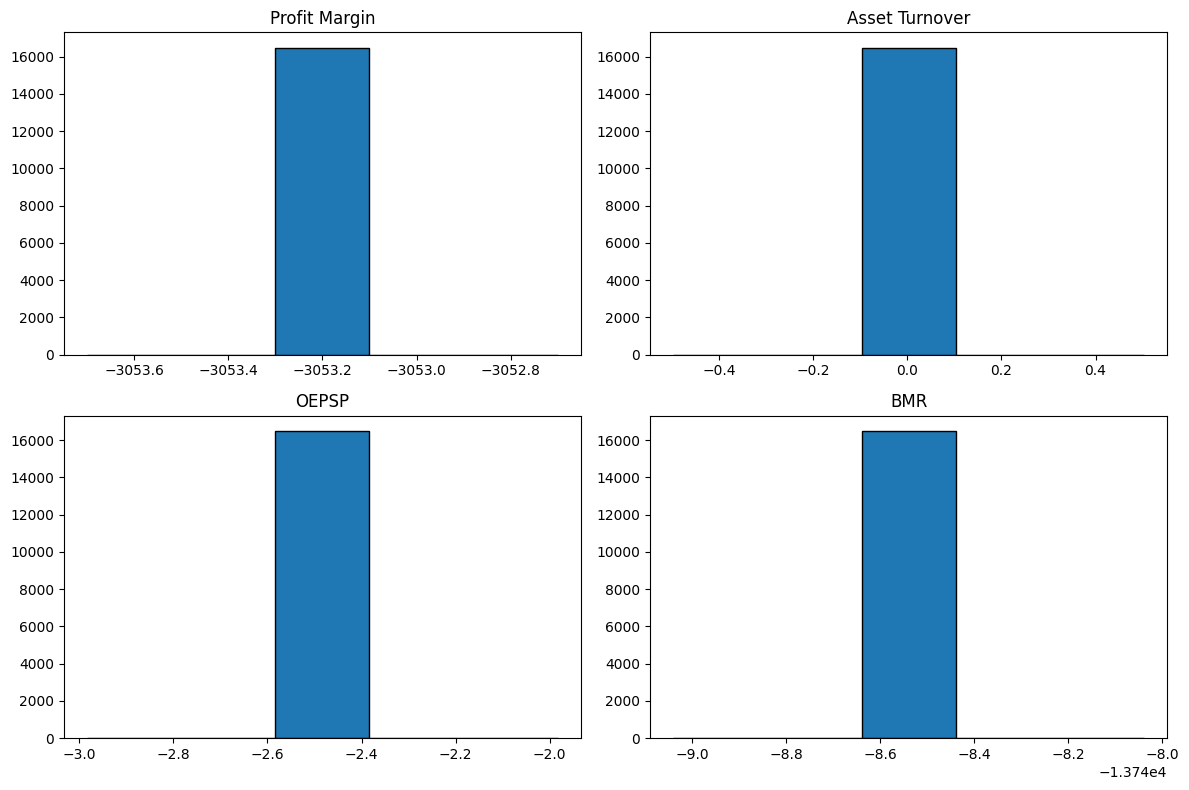

In [226]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize


# Crear una copia explícita del DataFrame
dumms_copy = dumms.copy()




# Aplicar Winsorization a cada ratio utilizando la función winsorize
dumms_copy['pm'] = winsorize(dumms_copy['pm'], limits=(0.001,0.999))
dumms_copy['ato'] = winsorize(dumms_copy['ato'], limits=(0.09,0.99))
dumms_copy['oepsp'] = winsorize(dumms_copy['oepsp'], limits=(0.01,0.99))
dumms_copy['bmr'] = winsorize(dumms_copy['bmr'], limits=(0.01, 0.99))


# Visualizar los histogramas para decidir el nivel de Winsorization en la copia del DataFrame
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(dumms_copy['pm'], bins=5, edgecolor='black')
plt.title('Profit Margin')

plt.subplot(2, 2, 2)
plt.hist(dumms_copy['ato'], bins=5, edgecolor='black')
plt.title('Asset Turnover')

plt.subplot(2, 2, 3)
plt.hist(dumms_copy['oepsp'], bins=5, edgecolor='black')
plt.title('OEPSP')

plt.subplot(2, 2, 4)
plt.hist(dumms_copy['bmr'], bins=5, edgecolor='black')
plt.title('BMR')

plt.tight_layout()
plt.show()

## 1.2.3 Multicollienarity


In [227]:

dumms_clean = dumms_copy.dropna(subset=['epsp'])


In [228]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant



# Crear una copia de las variables independientes
independent_vars = dumms_clean[[ 'pm', 'ato', 'epsp', 'oepsp','bmr']]

# Agregar una constante para calcular el VIF
independent_vars_with_const = add_constant(independent_vars)

# Calcular el VIF para cada variable independiente
vif_data = pd.DataFrame()
vif_data['Variable'] = independent_vars_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(independent_vars_with_const.values, i) for i in range(independent_vars_with_const.shape[1])]

vif_data


,Variable,VIF
0,pm,0.00
1,ato,0.00
2,epsp,1.00
3,oepsp,0.00
4,bmr,0.00


In [ ]:
Podemos observar 